# Exercise 1

We first load a dataset and examine its dimensions.

In [ ]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy') # Loads data into np array
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

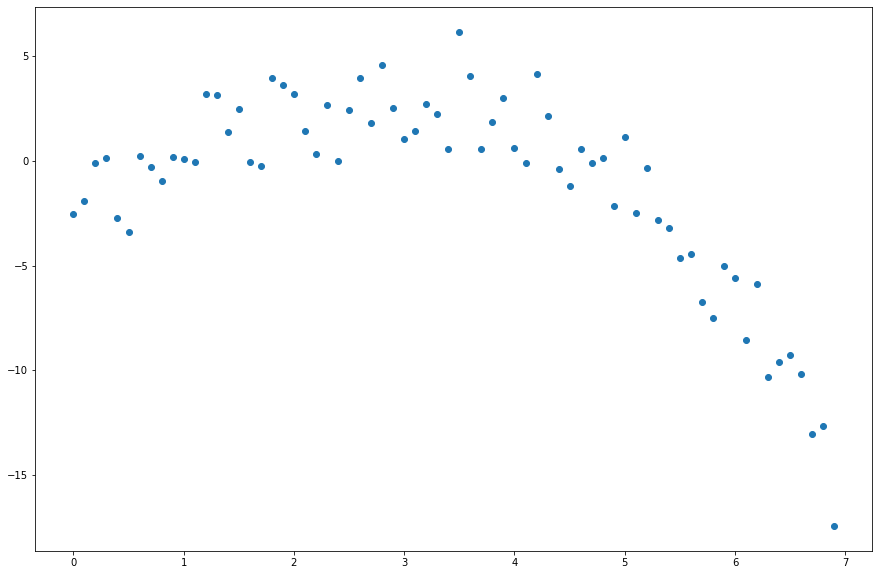

In [8]:
import matplotlib.pyplot as plt

x_data = xy_data[:,0] # First column of array (indexed by 0) 
y_data = xy_data[:,1] # Second column of array (indexed by 1) 

plt.scatter(x_data, y_data)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()



### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [5]:
def polyreg(data_matrix, k):
    
    # It was briefly tempting to go to the numpy source and copy the contents of polyfit
    # Instead, using only inspiration from the first given notebook

    # Validate inputs
    N = len(data_matrix) # This may fail and raise appropriate exception
    if N < 1:
        raise ValueError("Dataset must contain at least one datapoint")
    if data_matrix.ndim != 2:
        raise ValueError("Dataset must be pairs of values - the first the reference and the second the data")
    if type(k) is not int:
        raise TypeError("Degree k must be int, recieved", type(k))
    if k < 0:
        raise ValueError("Degree k must be zero or positive")

    # Handle large k - the unit test block below does not present a test for this requirement.
    if k >= N:
        order = N - 1
    else:
        order = k

    # Extract data
    references = data_matrix[:,0] # First column of array (indexed by 0) 
    datavalues = data_matrix[:,1] # Second column of array (indexed by 1) 

    # Create matrix X which contains all ones in first column, and instreasing powers of data references in the cols thereafter
    X  = np.column_stack(([references**i for i in range(order+1)])) # * unpacks the generator object. The highest power is order. The zeroth order is 'all ones'

    # Computing the coefficient vector beta* using least squares formula
    beta = np.linalg.lstsq(X, datavalues, rcond=None)[0] # copied from given notebook 1, "Fitting a quadratic model  to the CO2 data"
    # This built in function ^ is doing all the work. All I've done here is make a lengthly wrapper - 
    # perhaps this exercise has not gone deep enough to merit not using np.polyfit? Sure we could say beta_lin = np.linalg.inv(XT.dot(X)).dot(XT.dot(yvalues)) but is that really any       better?

    # Compute the fit / reconstruct the data using this model
    fit = X.dot(beta)

    # Calculate residuals
    residuals = datavalues - fit

    # Pad beta with zeros if large k was suppressed
    if k >= N:
        beta = np.append(beta, np.zeros(k - order))
    
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    return beta, fit, residuals
    

Use the tests below to check the outputs of the function you have written:

In [6]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth degree fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] # the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

# Add a test for beta length in k > N case?

# Anything to see if this cell has been run at all? Without this addition there is no indication that the test has been attempted!
print("polyreg function passed all tests") # Not displayed if AssertionError is encountered above

polyreg function passed all tests


### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

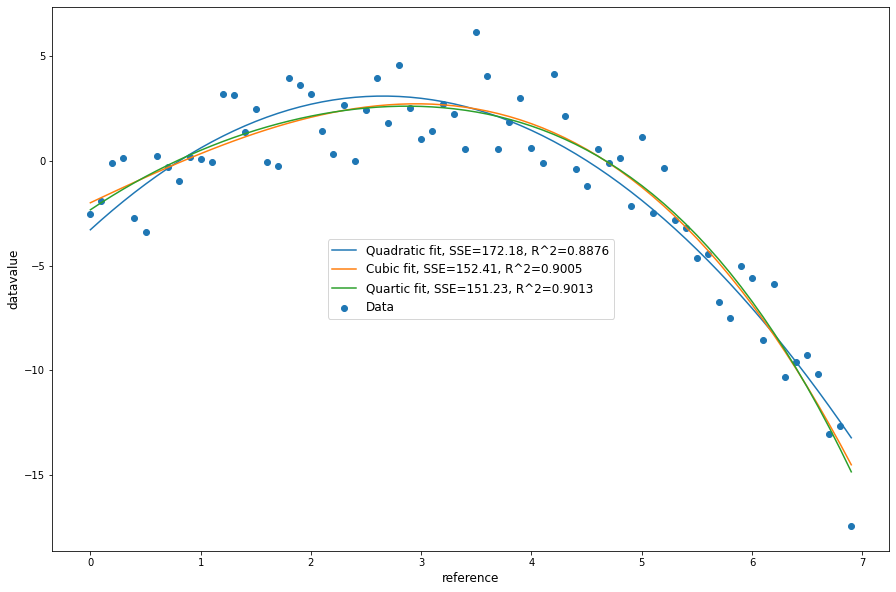

In [7]:
# This got repetitive so I replaced it with many iterators/loops

# Define which orders we are interested in
fitlist = [["zerofit", 0], ["Linear", 1], ["Quadratic fit", 2], ["Cubic fit", 3], ["Quartic fit", 4]]

# Do some polyregs.
for fit in fitlist:
    for i in polyreg(xy_data, fit[1]):
        fit.append(i)

# Compute and append some SSEs
for fit in fitlist:
    fit.append(np.linalg.norm(fit[4])**2) # Calculates SSE by summing squared residuals

# Compute and append some R^2 s
for fit in fitlist:
    fit.append(1 - fit[5]/fitlist[0][5]) # SSEs are stored in index 5 due to above

# The fits are now lists in a list, each of the form [name, order, betacoefficients, reconstructeddata, residuals, SSE, R^2]

# Plot fits
for fit in fitlist[2:]: # Don't plot zerofit or linear
    plt.plot(x_data, fit[3], label=fit[0]+ ", SSE=" + str(round(fit[5], 2)) + ", R^2=" + str(round(fit[6], 4)))

plt.scatter(x_data, y_data, label="Data")

plt.xlabel('reference', fontsize = 'large')
plt.ylabel('datavalue', fontsize = 'large')
plt.legend(fontsize = 'large', loc="center")
plt.show()


In [ ]:
 #### State which model you choose and briefly justify your choice.
 
# What model to use is always context dependent. Of course the highest order fit has the least error - but at the cost of model complexity and potentially overfitting the data. 
# The returns are diminishing. For most purposes I would likely use the quadratic fit - as although the cubic reduces SSE by 11.5%, the data still has lots of noise around all the curves. At each references, the curves appear roughly within the variance of the data to each other, suggesting the higher order models are not justified.
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

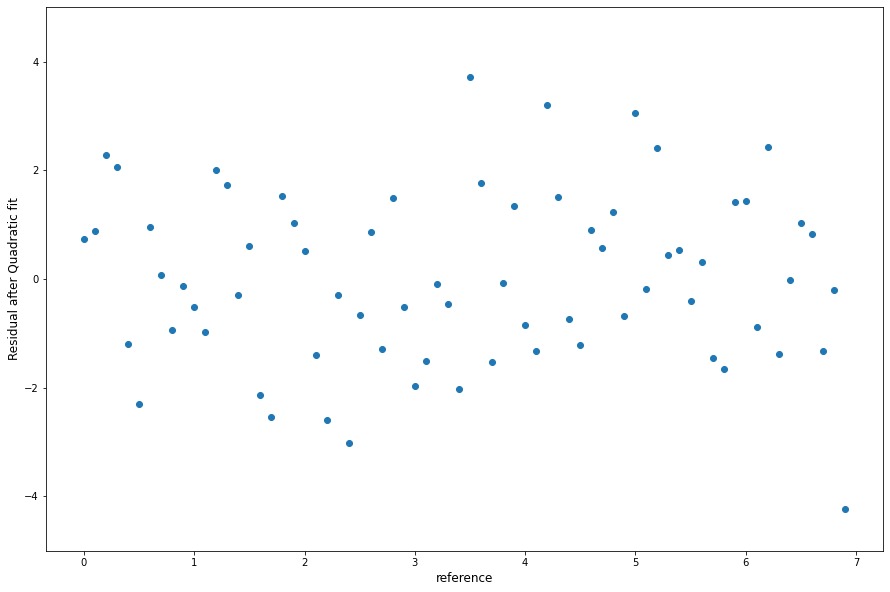

Mean of residuals =  0.0 Variance of residuals =  2.46


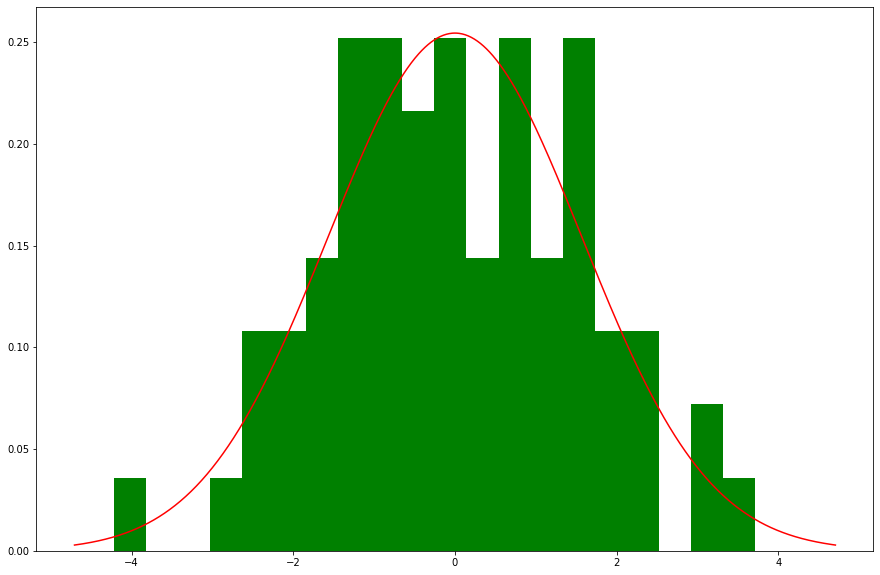

In [9]:
fit_order = 2 # Change me! 0=constant, 1=linear, 2=quadratic, 3=cubic, 4=quartic ...unsurprisingly

fit = fitlist[fit_order]
residuals = fit[4]

# Residuals scatter
plt.scatter(x_data, residuals)
plt.ylim(-5,5) # lock display for comparison of different fits
plt.xlabel('reference', fontsize = 'large')
plt.ylabel('Residual after ' + fit[0], fontsize = 'large')
plt.show()

# Print summary stats - lifting all this code straight from the handout
print('Mean of residuals = ', np.round(np.mean(residuals), 5), 'Variance of residuals = ', np.round(np.var(residuals), 3))

# Plot normed histogram of the residuals
from scipy.stats import norm
n, bins, patches = plt.hist(residuals, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
res_stdev = np.std(residuals)  # standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()
